# Impfraten bei Kindern

Gruppe: Léa Grandchamp, Brigit Marxe, Enea Solca

Fragen

- Wie haben sich die Durchimpfungsraten für zentrale Kinderimpfungen im Beobachtungszeitraum des Datensatzes entwickelt, und in welchen ausgewählten Ländern oder Weltregionen zeigen sich besonders starke Fortschritte bzw. Rückschritte?
- Gibt es systematische Unterschiede in der Höhe der Durchimpfungsraten zwischen verschiedenen Kinderimpfungen, und haben sich diese Unterschiede im Zeitverlauf vergrössert oder verkleinert?
- Lässt sich ein Zusammenhang zwischen den Durchimpfungsraten und der Kindersterblichkeit erstellen?

Quellen:
- https://ourworldindata.org/grapher/global-vaccination-coverage
- https://ourworldindata.org/child-mortality

## 1. Daten beschaffen und laden

In [46]:
import pandas as pd
from matplotlib import pyplot as plt

In [47]:
df1 = pd.read_csv("global-vaccination-coverage.csv", skiprows=1, names=["Entity","Code","Year","Share of one-year-olds who have had three doses of the hepatitis B vaccine","Share of one-year-olds vaccinated against Haemophilus influenzae type b","Share of one-year-olds who have had the one dose of the inactivated polio vaccine","Share of one-year-olds who have had one dose of the measles vaccine","Share of one-year-olds who have had the third dose of the pneumococcal conjugate vaccine","Share of one-year-olds who have had three doses of the polio vaccine","Share of one-year-olds vaccinated against rubella","Share of one-year-olds vaccinated against rotavirus","Share of one-year-olds who have had three doses of the diphtheria, tetanus and pertussis vaccine"])
                 
df1.head()

,Entity,Code,Year,Share of one-year-olds who have had three doses of the hepatitis B vaccine,Share of one-year-olds vaccinated against Haemophilus influenzae type b,Share of one-year-olds who have had the one dose of the inactivated polio vaccine,Share of one-year-olds who have had one dose of the measles vaccine,Share of one-year-olds who have had the third dose of the pneumococcal conjugate vaccine,Share of one-year-olds who have had three doses of the polio vaccine,Share of one-year-olds vaccinated against rubella,Share of one-year-olds vaccinated against rotavirus,"Share of one-year-olds who have had three doses of the diphtheria, tetanus and pertussis vaccine"
0,Afghanistan,AFG,2007,63.0,NaN,NaN,55.0,NaN,63.0,NaN,NaN,63.0
1,Afghanistan,AFG,2008,64.0,NaN,NaN,59.0,NaN,64.0,NaN,NaN,64.0
2,Afghanistan,AFG,2009,63.0,63.0,NaN,60.0,NaN,63.0,NaN,NaN,63.0
3,Afghanistan,AFG,2010,66.0,66.0,NaN,62.0,NaN,66.0,NaN,NaN,66.0
4,Afghanistan,AFG,2011,68.0,68.0,NaN,64.0,NaN,68.0,NaN,NaN,68.0


In [48]:
df2 = pd.read_csv("child-mortality.csv", skiprows=1, names=["Entity","Code","Year","Child mortality rate"])
df2.head()

,Entity,Code,Year,Child mortality rate
0,Afghanistan,AFG,1957,37.13
1,Afghanistan,AFG,1958,36.52
2,Afghanistan,AFG,1959,35.95
3,Afghanistan,AFG,1960,35.32
4,Afghanistan,AFG,1961,34.76


## 2. Daten vorbereiten
- Die Roh-Daten sind bereits im Long-Format
- Für die Analyse werden die Daten pivotiert: Jede Spalte repräsentiert eine Impfung, die Zeilen sind die verschiedenen Länder und Jahre - in absteigender, alphabetischer Reihenfolge.

In [49]:
merge_df = pd.merge(df1, df2, on=['Entity', 'Year'])
rename_df = merge_df.rename(columns={'Share of one-year-olds who have had three doses of the hepatitis B vaccine': 'Hepatitis B Vaccine Coverage','Share of one-year-olds vaccinated against Haemophilus influenzae type b': 'Hib Vaccine Coverage','Share of one-year-olds who have had the one dose of the inactivated polio vaccine': 'Inactivated Polio Vaccine Coverage','Share of one-year-olds who have had one dose of the measles vaccine': 'Measles Vaccine Coverage','Share of one-year-olds who have had the third dose of the pneumococcal conjugate vaccine': 'Pneumococcal Conjugate Vaccine Coverage','Share of one-year-olds who have had three doses of the polio vaccine': 'Polio Vaccine Coverage','Share of one-year-olds vaccinated against rubella': 'Rubella Vaccine Coverage','Share of one-year-olds vaccinated against rotavirus': 'Rotavirus Vaccine Coverage','Share of one-year-olds who have had three doses of the diphtheria, tetanus and pertussis vaccine': 'Di te per Vaccine Coverage','Child mortality rate': 'Child Mortality Rate'})
rename_df.head()





,Entity,Code_x,Year,Hepatitis B Vaccine Coverage,Hib Vaccine Coverage,Inactivated Polio Vaccine Coverage,Measles Vaccine Coverage,Pneumococcal Conjugate Vaccine Coverage,Polio Vaccine Coverage,Rubella Vaccine Coverage,Rotavirus Vaccine Coverage,Di te per Vaccine Coverage,Code_y,Child Mortality Rate
0,Afghanistan,AFG,2007,63.0,NaN,NaN,55.0,NaN,63.0,NaN,NaN,63.0,AFG,10.07
1,Afghanistan,AFG,2008,64.0,NaN,NaN,59.0,NaN,64.0,NaN,NaN,64.0,AFG,9.63
2,Afghanistan,AFG,2009,63.0,63.0,NaN,60.0,NaN,63.0,NaN,NaN,63.0,AFG,9.22
3,Afghanistan,AFG,2010,66.0,66.0,NaN,62.0,NaN,66.0,NaN,NaN,66.0,AFG,8.83
4,Afghanistan,AFG,2011,68.0,68.0,NaN,64.0,NaN,68.0,NaN,NaN,68.0,AFG,8.46


In [50]:
# Pivottabellen erstellen
df_pivot = rename_df.pivot(index='Entity', columns="Year", values= 'Hepatitis B Vaccine Coverage')
df_pivot


Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Entity,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,62.00000,64.00000,66.0000,64.00000,68.00000,65.00000,61.000000,55.00000,58.00000,60.00000
Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,73.05076,73.06001,75.6542,75.96257,77.12731,78.16292,75.550385,74.67232,74.55958,75.89457
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.00000,99.00000,99.0000,99.00000,99.00000,99.00000,98.000000,98.00000,97.00000,97.00000
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,95.00000,95.00000,91.0000,91.00000,91.00000,88.00000,84.000000,81.00000,77.00000,94.00000
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,95.00000,94.00000,94.0000,98.00000,98.00000,98.00000,98.000000,98.00000,96.00000,97.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,95.00000,97.00000,96.0000,94.00000,75.00000,89.00000,94.000000,83.00000,91.00000,65.00000
World,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,...,81.00000,83.00000,84.0000,84.00000,84.00000,86.00000,83.000000,81.00000,84.00000,84.00000
Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,70.00000,63.00000,63.0000,59.00000,54.00000,60.00000,57.000000,56.00000,58.00000,46.00000


In [51]:
df_pivot = rename_df.pivot(index='Entity', columns="Year", values= 'Hib Vaccine Coverage')
df_pivot.head()

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Entity,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,62.00000,64.00000,66.00000,64.00000,68.00000,65.00000,61.0000,55.00000,58.00000,60.00000
Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,73.05959,73.06435,75.66934,75.96544,77.12595,78.16157,75.5128,74.67649,74.55958,75.85002
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.00000,99.00000,99.00000,99.00000,99.00000,99.00000,98.0000,98.00000,97.00000,97.00000
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,95.00000,95.00000,91.00000,91.00000,91.00000,88.00000,84.0000,81.00000,77.00000,92.00000
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,97.00000,97.00000,98.00000,99.00000,99.00000,98.00000,98.0000,98.00000,97.00000,97.00000


In [52]:
df_pivot_polio = rename_df.pivot(index='Entity', columns="Year", values= 'Inactivated Polio Vaccine Coverage')
df_pivot_polio

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Entity,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,65.00000,61.00000,66.00000,63.000000,56.00000,56.00000,61.00000,59.00000
Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,20.985064,39.31993,39.26117,58.67651,76.924644,76.00112,74.90662,74.90682,77.21689
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,99.000000,99.00000,99.00000,99.00000,99.000000,99.00000,98.00000,98.00000,98.00000
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,8.000000,94.00000,92.00000,94.00000,93.000000,92.00000,90.00000,89.00000,92.00000
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,99.000000,99.00000,99.00000,99.00000,99.000000,99.00000,99.00000,98.00000,98.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,19.00000,73.000000,88.00000,80.00000,89.00000,85.00000
World,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,20.000000,40.00000,58.00000,73.00000,83.000000,80.00000,80.00000,84.00000,84.00000
Yemen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,12.000000,61.00000,58.00000,52.00000,59.000000,55.00000,55.00000,59.00000,48.00000


In [53]:
df_pivot = rename_df.pivot(index='Entity', columns="Year", values= 'Measles Vaccine Coverage')
df_pivot.head()

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Entity,,,,,,,,,,,,,,,,,,,,,
Afghanistan,11.000000,NaN,8.000000,9.000000,14.000000,14.00000,14.000000,31.00000,34.000000,22.000000,...,60.0000,62.00000,64.00000,64.00000,66.00000,57.00000,57.00000,51.0000,56.00000,55.000000
Africa,8.786264,13.580729,16.164875,22.499367,27.352703,37.62123,43.977207,48.10331,53.313152,58.961113,...,71.3308,70.98795,71.45272,72.51367,72.62932,73.30447,71.99248,70.4967,69.96948,70.975334
Albania,90.000000,90.000000,93.000000,96.000000,96.000000,96.00000,96.000000,96.00000,96.000000,96.000000,...,98.0000,97.00000,96.00000,96.00000,94.00000,95.00000,91.00000,87.0000,86.00000,83.000000
Algeria,NaN,NaN,NaN,NaN,NaN,68.00000,67.000000,73.00000,81.000000,82.000000,...,95.0000,95.00000,94.00000,88.00000,80.00000,80.00000,80.00000,79.0000,79.00000,99.000000
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,96.0000,96.00000,97.00000,99.00000,99.00000,99.00000,98.00000,99.0000,98.00000,99.000000


In [54]:
df_pivot = rename_df.pivot(index='Entity', columns="Year", values= 'Pneumococcal Conjugate Vaccine Coverage')
df_pivot.head()

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Entity,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,49.000000,64.000000,62.00000,63.00000,64.00000,61.00000,59.000,53.00000,55.00000,58.000000
Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45.394554,56.172188,62.72179,65.36093,67.09471,68.13085,66.598,64.46477,64.41756,59.669468
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,99.000000,99.000000,99.00000,99.00000,99.00000,96.00000,92.000,89.00000,87.00000,85.000000
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,61.00000,89.00000,91.00000,87.00000,83.000,78.00000,74.00000,89.000000
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,93.000000,92.000000,92.00000,98.00000,94.00000,96.00000,96.000,95.00000,95.00000,94.000000


In [55]:
df_pivot = rename_df.pivot(index='Entity', columns="Year", values= 'Polio Vaccine Coverage')
df_pivot.head()

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Entity,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,3.000000,5.000000,5.000000,16.000000,15.00000,11.000000,25.000000,35.000000,33.000000,...,63.00000,65.000000,66.000000,64.000000,67.00000,63.0000,61.00000,55.000000,60.000000,59.00000
Africa,10.656941,14.858231,17.513079,23.837606,28.816013,36.02056,41.261726,46.605217,50.110027,55.000828,...,73.28532,73.538574,74.914406,75.375946,76.39207,77.7159,74.14831,72.926674,72.966705,76.04714
Albania,92.000000,92.000000,92.000000,92.000000,92.000000,94.00000,94.000000,94.000000,96.000000,96.000000,...,98.00000,99.000000,98.000000,99.000000,99.00000,99.0000,98.00000,98.000000,98.000000,97.00000
Algeria,NaN,31.000000,31.000000,30.000000,30.000000,69.00000,72.000000,79.000000,85.000000,87.000000,...,95.00000,95.000000,91.000000,91.000000,91.00000,88.0000,84.00000,81.000000,77.000000,88.00000
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,97.00000,97.000000,98.000000,99.000000,99.00000,99.0000,99.00000,98.000000,97.000000,98.00000


In [56]:
df_pivot = rename_df.pivot(index='Entity', columns="Year", values= 'Rubella Vaccine Coverage')
df_pivot.head()

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Entity,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Africa,NaN,0.002408,0.005233,0.007863,0.006064,0.00698,0.007282,0.007152,0.006544,0.006418,...,16.351753,18.25738,19.588326,30.278917,35.983147,36.653473,38.986946,38.2449,38.287502,39.16091
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,98.000000,97.00000,96.000000,96.000000,94.000000,95.000000,91.000000,87.0000,86.000000,83.00000
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,88.000000,80.000000,80.000000,80.000000,79.0000,79.000000,99.00000
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,96.000000,96.00000,97.000000,99.000000,99.000000,99.000000,98.000000,99.0000,98.000000,99.00000


In [57]:
df_pivot = rename_df.pivot(index='Entity', columns="Year", values= 'Rotavirus Vaccine Coverage')
df_pivot.head()

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Entity,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,46.000000,49.000000,53.000000,50.000000,53.000000,55.000000
Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,29.855795,37.113605,41.17311,42.5027,44.782265,47.228058,49.576485,50.962242,49.963673,56.791176
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98.000000,98.000000,97.000000,97.000000
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
df_pivot = rename_df.pivot(index='Entity', columns="Year", values= 'Di te per Vaccine Coverage')
df_pivot.head()

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Entity,,,,,,,,,,,,,,,,,,,,,
Afghanistan,4.000000,3.000000,5.000000,5.000000,16.00000,15.000000,11.00000,25.00000,35.000000,33.00000,...,62.00000,64.00000,66.000000,64.00000,68.00000,65.00000,61.00000,55.00000,58.00000,60.000000
Africa,9.277582,14.022753,15.809792,22.322681,28.28405,36.268597,40.47252,46.72535,50.223446,55.14232,...,73.63328,73.12944,75.721985,76.03318,77.16519,78.16262,75.56682,74.68514,74.55958,75.851456
Albania,94.000000,94.000000,95.000000,95.000000,95.00000,96.000000,96.00000,96.00000,96.000000,94.00000,...,99.00000,99.00000,99.000000,99.00000,99.00000,99.00000,98.00000,98.00000,97.00000,97.000000
Algeria,NaN,NaN,NaN,NaN,NaN,69.000000,73.00000,79.00000,85.000000,87.00000,...,95.00000,95.00000,91.000000,91.00000,91.00000,88.00000,84.00000,81.00000,77.00000,92.000000
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,97.00000,97.00000,98.000000,99.00000,99.00000,99.00000,99.00000,99.00000,98.00000,98.000000


In [59]:
df_pivot = rename_df.pivot(index='Entity', columns="Year", values= 'Child Mortality Rate')
df_pivot.head()

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Entity,,,,,,,,,,,,,,,,,,,,,
Afghanistan,24.57,23.94,27.99,27.44,30.91,30.09,25.31,24.72,21.84,18.71,...,7.51,7.24,7.00,6.76,6.54,6.33,6.13,5.93,5.74,5.55
Africa,18.78,18.30,17.89,18.27,17.86,17.45,16.98,16.18,16.24,15.64,...,7.68,7.49,7.31,7.17,6.83,6.66,6.43,6.27,6.22,5.91
Albania,8.12,7.49,6.90,6.37,5.90,5.48,5.11,4.79,4.51,4.28,...,0.99,0.96,0.94,0.93,0.93,0.94,0.94,0.95,0.94,0.94
Algeria,NaN,14.03,12.31,10.52,8.91,7.61,6.63,5.96,5.55,5.30,...,2.54,2.49,2.45,2.40,2.37,2.33,2.29,2.26,2.23,2.20
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.37,0.35,0.34,0.32,0.31,0.30,0.29,0.28,0.27,0.26


## 3. Statistik der Roh-Daten (Analyse im Long-Format)

Über die einzelnen Spalten kann folgendes ausgesagt werden:

- Die Spalte Länder enthält 205 verschieden Länder.
- Die Spalte Codes enthält 196 verschiedene Codes.
- Es sind Daten zwischen 1980 and 2024 vorhanden. 
- Ab dem Jahr 2011 sind die Daten komplett.
- Die Impfraten bewegen sich zwischen x% und x%
- Belgien ist das Land mit der durchschnittlich höchsten Impfrate bei Polio
- Papa Neu Guinea ist das Land mit der durchschnittlich tiefsten Impfrate bei Polio
- Malawi liegt bei der durchschnittlichen Impfrate von Polio an nächsten beim Median


In [60]:
print(rename_df.dtypes)


Entity                                      object
Code_x                                      object
Year                                         int64
Hepatitis B Vaccine Coverage               float64
Hib Vaccine Coverage                       float64
Inactivated Polio Vaccine Coverage         float64
Measles Vaccine Coverage                   float64
Pneumococcal Conjugate Vaccine Coverage    float64
Polio Vaccine Coverage                     float64
Rubella Vaccine Coverage                   float64
Rotavirus Vaccine Coverage                 float64
Di te per Vaccine Coverage                 float64
Code_y                                      object
Child Mortality Rate                       float64
dtype: object


### 3.1 Analyse Länder

In [61]:
print('Anzahl verschiedener Länder: ', len(rename_df['Entity'].unique()))

Anzahl verschiedener Länder:  205


In [62]:
# Anzahl Datenpunkte pro Land
rename_df['Entity'].value_counts()

Entity
Afghanistan            44
Africa                 44
Albania                44
Argentina              44
Antigua and Barbuda    44
                       ..
Sierra Leone           25
Liberia                25
East Timor             22
Montenegro             18
South Sudan            13
Name: count, Length: 205, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Land'}, xlabel='Entity', ylabel='Anzahl Datenpunkte'>

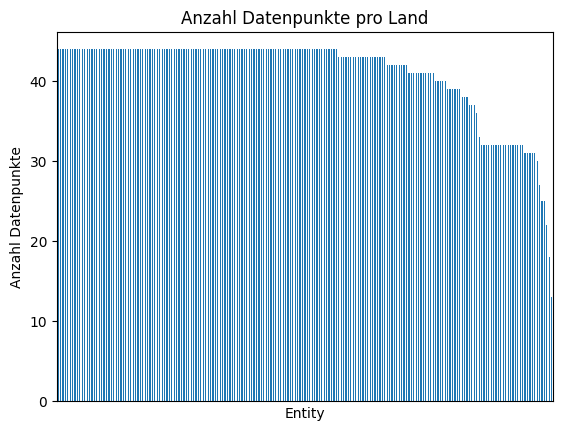

In [63]:
rename_df['Entity'].value_counts().plot(kind='bar', 
                                 xticks=[],     # disable labels on x-axis
                                 ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Land')

In [64]:
#Mittelwerte
mittelwerte = df_pivot_polio.mean(axis=1)
print(mittelwerte)




Entity
Afghanistan    60.875000
Africa         59.799863
Albania        98.666667
Algeria        82.666667
Andorra        98.777778
                 ...    
Vietnam        72.333333
World          66.888889
Yemen          51.000000
Zambia         71.333333
Zimbabwe       83.800000
Length: 205, dtype: float64


In [65]:
Entity_max = mittelwerte.idxmax()
Entity_min = mittelwerte.idxmin()

print("Land mit höchster durchschnittlicher Impfrate:", Entity_max)
print("Land mit tiefster durchschnittlicher Impfrate:", Entity_min)

medianwert = mittelwerte.median()
print("Medianwert:", medianwert)

# Differenz zum Median
abweichung = (mittelwerte - medianwert).abs()

# Land mit geringster Abweichung vom Median
land_median = abweichung.idxmin()

print("Land nahe am Medianwert:", land_median)



Land mit höchster durchschnittlicher Impfrate: Belgium
Land mit tiefster durchschnittlicher Impfrate: Papua New Guinea
Medianwert: 89.2
Land nahe am Medianwert: Malawi


### 3.2 Analyse Codes

In [67]:
print('Anzahl verschiedener Codes: ', len(rename_df['Code_x'].unique()))

Anzahl verschiedener Codes:  196


In [68]:
# Anzahl Datenpunkte pro Land
rename_df['Code_x'].value_counts()

Code_x
AFG    44
ALB    44
ARG    44
DEU    44
ATG    44
       ..
SLE    25
LBR    25
TLS    22
MNE    18
SSD    13
Name: count, Length: 195, dtype: int64

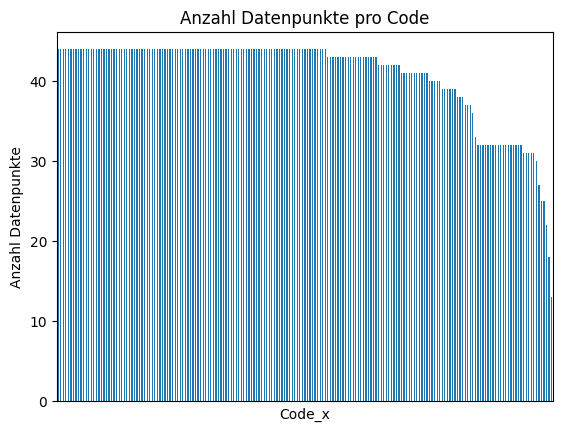

In [69]:
rename_df['Code_x'].value_counts().plot(kind='bar',xticks=[], ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Code');

### 3.3 Analyse Jahr

In [70]:
print('Anzahl verschiedener Jahre: ', len(rename_df['Year'].unique()))

Anzahl verschiedener Jahre:  44


In [71]:
# Anzahl Datenpunkte pro Jahr
rename_df['Year'].value_counts().sort_index()

Year
1980    116
1981    136
1982    145
1983    156
1984    161
1985    167
1986    170
1987    173
1988    174
1989    174
1990    174
1991    175
1992    193
1993    198
1994    199
1995    199
1996    199
1997    200
1998    200
1999    202
2000    202
2001    202
2002    203
2003    203
2004    203
2005    203
2006    204
2007    204
2008    204
2009    204
2010    204
2011    205
2012    205
2013    205
2014    205
2015    205
2016    205
2017    205
2018    205
2019    205
2020    205
2021    205
2022    205
2023    205
Name: count, dtype: int64

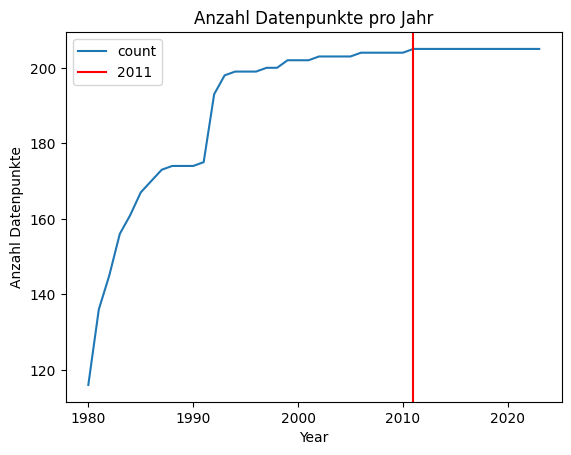

In [72]:
# Jahre mit maximaler Anzahl Datenpunkte (257)
g = rename_df['Year'].value_counts().sort_index().plot(ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Jahr');
g.axvline(x=2011, color='red',label='2011') # rote Linie bei 1950 - ab hier sind alle Jahre enthalten
g.legend()  # Legende anzeigen

### 3.4 Analyse Durchimpfungsrate

In [73]:
rename_df.describe()

,Year,Hepatitis B Vaccine Coverage,Hib Vaccine Coverage,Inactivated Polio Vaccine Coverage,Measles Vaccine Coverage,Pneumococcal Conjugate Vaccine Coverage,Polio Vaccine Coverage,Rubella Vaccine Coverage,Rotavirus Vaccine Coverage,Di te per Vaccine Coverage,Child Mortality Rate
count,8412.000000,4929.000000,4111.000000,1728.000000,8261.000000,1875.000000,8388.000000,4714.000000,1341.000000,8384.000000,8412.000000
mean,2002.638968,82.059012,83.069218,83.984932,78.609822,77.051267,80.180549,84.502788,69.246996,79.772187,5.149359
std,12.308061,21.579231,20.967083,20.513621,21.565537,23.758945,21.746525,22.007045,26.716173,21.799680,5.590848
min,1980.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.140000
25%,1992.000000,77.000000,78.417250,77.000000,68.000000,68.000000,72.000000,83.000000,55.000000,71.988934,1.217500
50%,2003.000000,91.000000,91.000000,93.000000,87.000000,86.000000,89.000000,93.000000,79.000000,88.000000,2.810000
75%,2013.000000,96.000000,96.000000,98.000000,95.000000,94.000000,96.000000,97.000000,90.000000,96.000000,7.280000
max,2023.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,47.890000


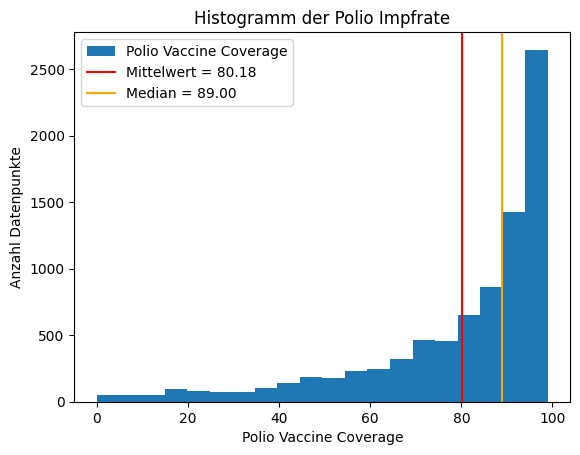

In [74]:
g = rename_df['Polio Vaccine Coverage'].plot(kind='hist', bins=20, title='Histogramm der Polio Impfrate', 
                           xlabel='Polio Vaccine Coverage', ylabel='Anzahl Datenpunkte')
mean = rename_df['Polio Vaccine Coverage'].mean()
g.axvline(x=rename_df['Polio Vaccine Coverage'].mean(), color='red',label=f'Mittelwert = {mean:.2f}')  # rote Linie bei Mittelwert

median = rename_df['Polio Vaccine Coverage'].median()
g.axvline(x=rename_df['Polio Vaccine Coverage'].median(), color='orange',label=  f'Median = {median:.2f}')  # orange Linie bei Median

g.legend()

### 3.5 Analyse Polio Impfung

In [75]:
print('Mittelwert:',rename_df['Polio Vaccine Coverage'].mean())
print('Median:',rename_df['Polio Vaccine Coverage'].median())
print('Standardabweichung:',rename_df['Polio Vaccine Coverage'].std())
print('5% Perzentil:',rename_df['Polio Vaccine Coverage'].quantile(0.05))
print('99.9% Perzentil:',rename_df['Polio Vaccine Coverage'].quantile(0.999))


Mittelwert: 80.18054893921077
Median: 89.0
Standardabweichung: 21.74652519363371
5% Perzentil: 30.0
99.9% Perzentil: 99.0


### 3.6 Analyse Kindersterblichkeit

In [76]:
print('Mittelwert:',rename_df['Child Mortality Rate'].mean())
print('Median:',rename_df['Child Mortality Rate'].median())
print('Standardabweichung:',rename_df['Child Mortality Rate'].std())
print('5% Perzentil:',rename_df['Child Mortality Rate'].quantile(0.05))
print('99.9% Perzentil:',rename_df['Child Mortality Rate'].quantile(0.999))


Mittelwert: 5.1493592486923445
Median: 2.81
Standardabweichung: 5.590847857892816
5% Perzentil: 0.4
99.9% Perzentil: 33.864920000000495


In [77]:
rename_df.describe()

,Year,Hepatitis B Vaccine Coverage,Hib Vaccine Coverage,Inactivated Polio Vaccine Coverage,Measles Vaccine Coverage,Pneumococcal Conjugate Vaccine Coverage,Polio Vaccine Coverage,Rubella Vaccine Coverage,Rotavirus Vaccine Coverage,Di te per Vaccine Coverage,Child Mortality Rate
count,8412.000000,4929.000000,4111.000000,1728.000000,8261.000000,1875.000000,8388.000000,4714.000000,1341.000000,8384.000000,8412.000000
mean,2002.638968,82.059012,83.069218,83.984932,78.609822,77.051267,80.180549,84.502788,69.246996,79.772187,5.149359
std,12.308061,21.579231,20.967083,20.513621,21.565537,23.758945,21.746525,22.007045,26.716173,21.799680,5.590848
min,1980.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.140000
25%,1992.000000,77.000000,78.417250,77.000000,68.000000,68.000000,72.000000,83.000000,55.000000,71.988934,1.217500
50%,2003.000000,91.000000,91.000000,93.000000,87.000000,86.000000,89.000000,93.000000,79.000000,88.000000,2.810000
75%,2013.000000,96.000000,96.000000,98.000000,95.000000,94.000000,96.000000,97.000000,90.000000,96.000000,7.280000
max,2023.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,47.890000


In [78]:
rename_df.sort_values(by='Child Mortality Rate', ascending=False).head(10)

,Entity,Code_x,Year,Hepatitis B Vaccine Coverage,Hib Vaccine Coverage,Inactivated Polio Vaccine Coverage,Measles Vaccine Coverage,Pneumococcal Conjugate Vaccine Coverage,Polio Vaccine Coverage,Rubella Vaccine Coverage,Rotavirus Vaccine Coverage,Di te per Vaccine Coverage,Code_y,Child Mortality Rate
1400,Central African Republic,CAF,2009,42.0,42.0,NaN,56.0,NaN,45.0,NaN,NaN,42.0,CAF,47.89
6910,Somalia,SOM,1992,NaN,NaN,NaN,32.0,NaN,20.0,NaN,NaN,21.0,SOM,45.60
6909,Somalia,SOM,1991,NaN,NaN,NaN,30.0,NaN,18.0,NaN,NaN,20.0,SOM,44.29
6291,Rwanda,RWA,1994,NaN,NaN,NaN,25.0,NaN,23.0,NaN,NaN,23.0,RWA,38.90
1413,Central African Republic,CAF,2022,33.0,33.0,33.0,32.0,32.0,35.0,NaN,NaN,33.0,CAF,38.74
6929,Somalia,SOM,2011,NaN,NaN,NaN,46.0,NaN,49.0,NaN,NaN,41.0,SOM,35.85
5364,Niger,NER,1987,NaN,NaN,NaN,27.0,NaN,7.0,NaN,NaN,7.0,NER,34.09
5363,Niger,NER,1986,NaN,NaN,NaN,27.0,NaN,5.0,NaN,NaN,5.0,NER,33.99
5365,Niger,NER,1988,NaN,NaN,NaN,24.0,NaN,9.0,NaN,NaN,9.0,NER,33.98
5362,Niger,NER,1985,NaN,NaN,NaN,27.0,NaN,4.0,NaN,NaN,4.0,NER,33.70


In [79]:
rename_df.sort_values(by='Polio Vaccine Coverage', ascending=False).head(10)

,Entity,Code_x,Year,Hepatitis B Vaccine Coverage,Hib Vaccine Coverage,Inactivated Polio Vaccine Coverage,Measles Vaccine Coverage,Pneumococcal Conjugate Vaccine Coverage,Polio Vaccine Coverage,Rubella Vaccine Coverage,Rotavirus Vaccine Coverage,Di te per Vaccine Coverage,Code_y,Child Mortality Rate
6355,Saint Lucia,LCA,2014,99.0,99.0,NaN,99.0,NaN,99.0,99.0,NaN,99.0,LCA,1.75
6327,Saint Kitts and Nevis,KNA,1986,NaN,NaN,NaN,96.0,NaN,99.0,NaN,NaN,99.0,KNA,3.56
6354,Saint Lucia,LCA,2013,99.0,99.0,NaN,99.0,NaN,99.0,99.0,NaN,99.0,LCA,1.77
6330,Saint Kitts and Nevis,KNA,1989,NaN,NaN,NaN,90.0,NaN,99.0,90.0,NaN,99.0,KNA,3.12
6331,Saint Kitts and Nevis,KNA,1990,NaN,NaN,NaN,99.0,NaN,99.0,99.0,NaN,99.0,KNA,3.03
6332,Saint Kitts and Nevis,KNA,1991,NaN,NaN,NaN,99.0,NaN,99.0,99.0,NaN,99.0,KNA,2.96
6333,Saint Kitts and Nevis,KNA,1992,NaN,NaN,NaN,99.0,NaN,99.0,99.0,NaN,99.0,KNA,2.90
1538,China,CHN,2009,99.0,NaN,NaN,99.0,NaN,99.0,NaN,NaN,99.0,CHN,1.71
1537,China,CHN,2008,95.0,NaN,NaN,97.0,NaN,99.0,NaN,NaN,97.0,CHN,1.85
1367,Cape Verde,CPV,2010,98.0,NaN,NaN,97.0,NaN,99.0,NaN,NaN,99.0,CPV,2.67


<Axes: ylabel='Frequency'>

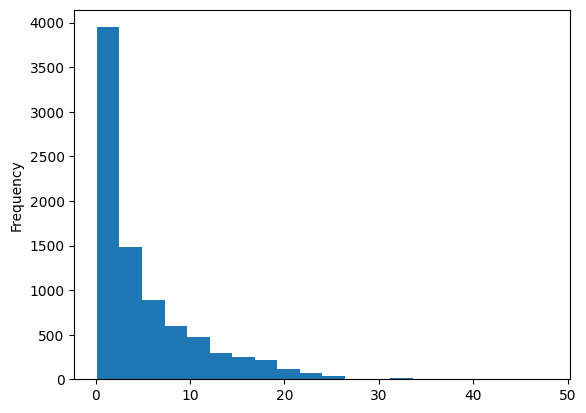

In [80]:
rename_df['Child Mortality Rate'].plot(kind='hist', bins=20)

<Axes: ylabel='Frequency'>

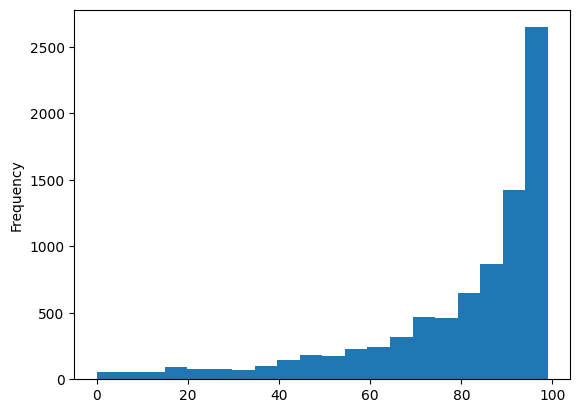

In [81]:
rename_df['Polio Vaccine Coverage'].plot(kind='hist', bins=20)

## 4. Analyse
### Vorgehen
### Beobachtungen
### Interpretation

### Berechnungen

### Visualisierung